# GENESIM with continuous training image

Mariethoz et al. (2010) propose to weight conditonal data by distance. This is implemented with mps_genesim, and can be controlled by

    O.par['distance_measure'] # Distance measure [1]: discrete, [2]: continous
    O.par['distance_min'] ; # Max distance
    O.par['distance_pow'] ; # Power

See details about distance weighing in [Mariethoz, Gregoire, Philippe Renard, and Julien Straubhaar. "The direct sampling method to perform multiple‐point geostatistical simulations." Water Resources Research 46.11 (2010).
](https://doi.org/10.1029/2008WR007621).

In [1]:
# import mpslib as mps
import matplotlib.pyplot as plt
import numpy as np
import mpslib as mps


In [35]:
O=mps.mpslib(method='mps_genesim', 
             verbose_level=0, 
             n_cond = 25,
             n_real=1, 
             simulation_grid_size=np.array([150, 150, 1]));

O.ti, TI_filename = mps.trainingimages.stones()
O.delete_local_files()

Using mps_genesim installed in /mnt/c/Users/thoma/PROGRAMMING/mpslib (scikit-mps in /mnt/c/Users/thoma/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)


In [33]:
O.par['distance_max']=5
O.par['distance_pow']=2
O.par['distance_measure']=2 # continuous
O.run()


mpslib: Writing GENESIM type parameter file: mps.txt
mpslib: trying to run '/mnt/c/Users/thoma/PROGRAMMING/mpslib/mps_genesim' using 'mps.txt'

mpslib: Using the following executable to run the model: /mnt/c/Users/thoma/PROGRAMMING/mpslib/mps_genesim
mpslib: trying to run  /mnt/c/Users/thoma/PROGRAMMING/mpslib/mps_genesim mps.txt
mpslib: 'mps_genesim' ran in    2.57s 
mpslib: Reading: ti.dat_sg_0.gslib


True

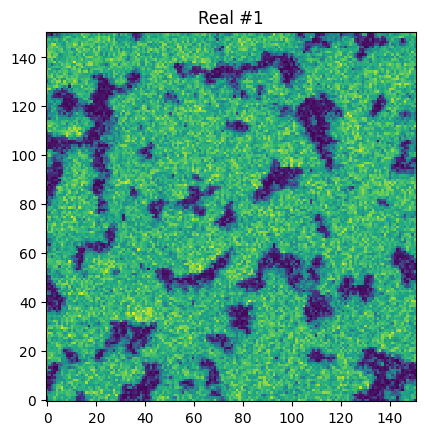

In [34]:
O.par
O.plot_reals()

distance_max=40 distance_pow=0, t=1.06s
distance_max=40 distance_pow=1, t=1.10s
distance_max=40 distance_pow=2, t=1.06s
distance_max=30 distance_pow=0, t=1.10s
distance_max=30 distance_pow=1, t=1.26s
distance_max=30 distance_pow=2, t=1.17s
distance_max=20 distance_pow=0, t=1.51s
distance_max=20 distance_pow=1, t=1.79s
distance_max=20 distance_pow=2, t=1.56s


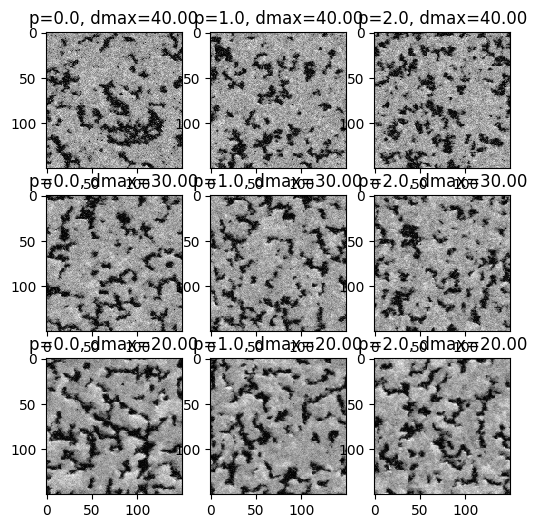

In [27]:
distance_max_arr = [40,30,20]
distance_pow_arr = [0, 1, 2]

n1=len(distance_max_arr)
n2=len(distance_pow_arr)

T=np.zeros((n1,n2))

fig = plt.figure(figsize=(6, 6))
for i1 in np.arange(n1):
    for i2 in np.arange(n2):
        
        O.par['distance_max']=distance_max_arr[i1]
        O.par['distance_pow']=distance_pow_arr[i2]
        O.par['distance_measure']=2 # continuous
        O.run()
        T[i1,i2]=O.time
        
        print('distance_max=%g distance_pow=%g, t=%4.2fs' % (O.par['distance_max'],O.par['distance_pow'],T[i1,i2]))
        
        
        isp = i1*n2+i2+1    
        plt.subplot(n1,n2,isp)
        D=np.squeeze(np.transpose(O.sim[0]));
        plt.imshow(D, interpolation='none', vmin=0, vmax=256, cmap='gray')
        plt.title('p=%3.1f, dmax=%3.2f' % (O.par['distance_pow'],O.par['distance_max']) )
            

Text(0, 0.5, 'Time (s)')

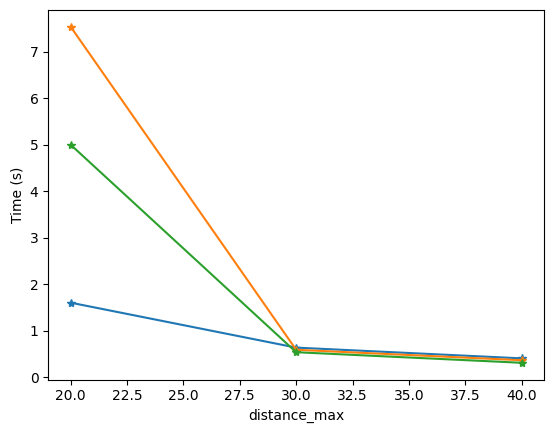

In [22]:
plt.plot(distance_max_arr,T,'-*')
plt.xlabel('distance_max')
plt.ylabel('Time (s)')
#plt.legend()